**Importing required libraries**

In [ ]:
from __future__ import print_function
from keras_preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Import data and preprocessing**

In [ ]:
MAX_FEATURES = 20000
# cut texts after this number of words (among top MAX_FEATURES most common words)
MAX_SENTENCE_LENGTH = 80

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# View one example of our dataset before our preprocessing.
print("\nExample one before our preprocessing")
print(x_train[0])

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences

Example one before our preprocessing
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 2

In [ ]:
print('\n\nPad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=MAX_SENTENCE_LENGTH)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_SENTENCE_LENGTH)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# View one example of our dataset after our preprocessing.
print("\nExample one after our preprocessing")
print(x_train[0])



Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)

Example one after our preprocessing
[   15   256     4     2     7  3766     5   723    36    71    43   530
   476    26   400   317    46     7     4 12118  1029    13   104    88
     4   381    15   297    98    32  2071    56    26   141     6   194
  7486    18     4   226    22    21   134   476    26   480     5   144
    30  5535    18    51    36    28   224    92    25   104     4   226
    65    16    38  1334    88    12    16   283     5    16  4472   113
   103    32    15    16  5345    19   178    32]


**LSTM Model for sentiment analysis**

In [ ]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 128
BATCH_SIZE = 32
NUM_EPOCHS = 15

print('Build model...')
model = Sequential()
model.add(Embedding(MAX_FEATURES, EMBEDDING_SIZE, input_length=MAX_SENTENCE_LENGTH))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [ ]:
# summary of our model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 128)           2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Training and Evaluate the Model**

In [ ]:
history = model.fit(x_train, y_train,batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,
          validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 228s 287ms/step - loss: 0.4347 - accuracy: 0.7931 - val_loss: 0.3542 - val_accuracy: 0.8445
Epoch 2/15
782/782 [==============================] - 229s 293ms/step - loss: 0.2551 - accuracy: 0.8973 - val_loss: 0.4593 - val_accuracy: 0.8270
Epoch 3/15
782/782 [==============================] - 227s 290ms/step - loss: 0.1603 - accuracy: 0.9407 - val_loss: 0.4976 - val_accuracy: 0.8276
Epoch 4/15
782/782 [==============================] - 224s 287ms/step - loss: 0.1024 - accuracy: 0.9638 - val_loss: 0.5900 - val_accuracy: 0.8224
Epoch 5/15
782/782 [==============================] - 224s 286ms/step - loss: 0.0697 - accuracy: 0.9761 - val_loss: 0.7982 - val_accuracy: 0.8188
Epoch 6/15
782/782 [==============================] - 223s 285ms/step - loss: 0.0523 - accuracy: 0.9824 - val_loss: 0.7531 - val_accuracy: 0.8205
Epoch 7/15
782/782 [==============================] - 225s 288ms/step - loss: 0.0385 - accuracy: 0.9868 - val_loss: 0.7228 -

In [ ]:
score, acc = model.evaluate(x_test, y_test,batch_size=BATCH_SIZE)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 25s 31ms/step - loss: 1.0469 - accuracy: 0.8147
Test score: 1.0469002723693848
Test accuracy: 0.8146799802780151


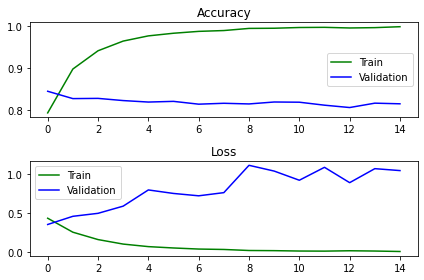

In [ ]:
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()